In [6]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 99.5 MB/s eta 0:00:00


In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset

# Define the transformation to convert images to tensors
transform = transforms.Compose([transforms.ToTensor()])

# Download and load the MNIST dataset
mnist_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [8]:
# Create a subset of 1,000 samples
subset_indices = torch.randperm(len(mnist_dataset))[:1000]  # Randomly select 1000 indices
mnist_subset = Subset(mnist_dataset, subset_indices)

# Verify the subset size
print(f"Subset size: {len(mnist_subset)}")


Subset size: 1000


In [9]:
import matplotlib.pyplot as plt

In [10]:
def show_samples(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i in range(num_samples):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap="gray")
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.show()

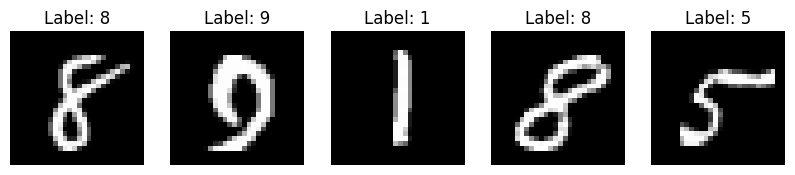

In [11]:
show_samples(mnist_subset)

In [13]:
import numpy as np

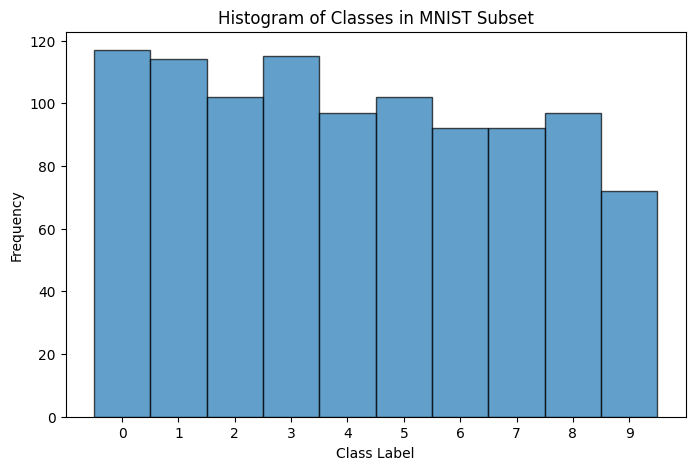

In [14]:
# Plot histogram of classes in the subset
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.figure(figsize=(8, 5))
plt.hist(labels, bins=np.arange(11)-0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(10))
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.title("Histogram of Classes in MNIST Subset")
plt.show()

In [16]:
!pip install einops
from einops import rearrange

In [26]:
mnist_subset[0][0].shape

torch.Size([1, 28, 28])

In [17]:
# Convert subset to batched format
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))])  # Shape: [1000, 1, 28, 28]
batches = rearrange(images, '(b n) c h w -> b n c h w', n=25)  # Shape: [Number of Batches, Batch Size, 1, 28, 28]

print(f"Batched subset shape: {batches.shape}")

Batched subset shape: torch.Size([40, 25, 1, 28, 28])


In [27]:
from mpl_toolkits.mplot3d import Axes3D

In [43]:
# Randomly select an MNIST image and plot it in 3D
sample_idx = torch.randint(0, len(mnist_subset), (1,)).item()
sample_image, number = mnist_subset[sample_idx]
image_array = sample_image.squeeze().numpy()

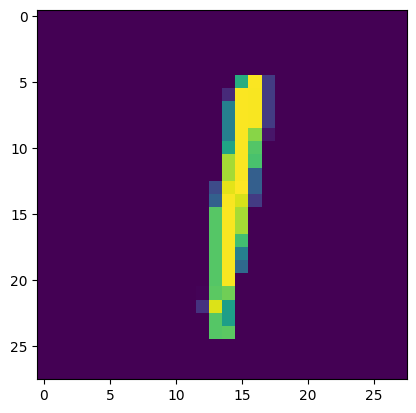

In [44]:
plt.imshow(image_array)

In [45]:
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = image_array

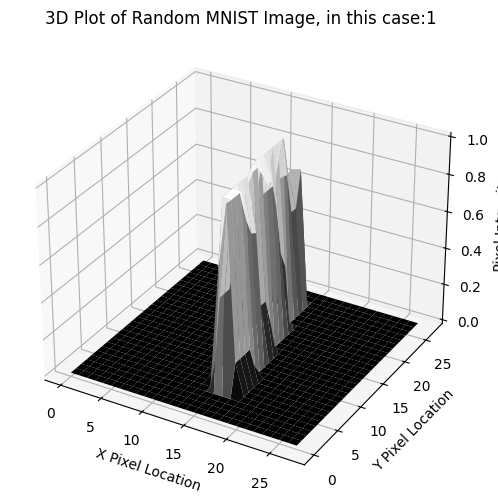

In [48]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gray')
ax.set_xlabel("X Pixel Location")
ax.set_ylabel("Y Pixel Location")
ax.set_zlabel("Pixel Intensity")
ax.set_title(f"3D Plot of Random MNIST Image, in this case:{number}")
plt.show()